In [109]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [110]:
df = pd.read_csv("train.csv")

In [111]:
df.head

<bound method NDFrame.head of        user_reputation  reply_count  thumbs_up  thumbs_down  best_score  \
0                    1            0          0            0         100   
1                    1            0          0            0         100   
2                    1            0          0            0         100   
3                   10            0          5            2         261   
4                    1            0          0            0         100   
...                ...          ...        ...          ...         ...   
14540                1            0          1            0         193   
14541                1            0          1            0         193   
14542                1            0          0            0         100   
14543                1            0          0            0         100   
14544                1            0          0            0         100   

                                                    text  stars  
0  

# Clean Train set

In [112]:
#Clean rows where 'stars' column has a value of 0,denoting an absence of rating
df_clean = df[df['stars'] != 0]

#fill missing text value
df_clean.loc[:, 'text'] = df_clean['text'].fillna("Text missing")

# Check to ensure no more missing values in 'text' column
print(df_clean.isnull().sum())

#To view the shape of the DataFrame
print(df_clean.shape)

user_reputation    0
reply_count        0
thumbs_up          0
thumbs_down        0
best_score         0
text               0
stars              0
dtype: int64
(13189, 7)


/var/folders/0f/fvfgpjxn28q0vmf0v53kjtl80000gn/T/ipykernel_13719/1146024053.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.loc[:, 'text'] = df_clean['text'].fillna("Text missing")


In [113]:
#Found &#39 in dataset, decode HTML entities

import html

def decode_html_entities(text):
    return html.unescape(text)

df_clean['text'] = df_clean['text'].apply(decode_html_entities)

/var/folders/0f/fvfgpjxn28q0vmf0v53kjtl80000gn/T/ipykernel_13719/4015499222.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['text'] = df_clean['text'].apply(decode_html_entities)


# Preprocessing the data

In [114]:
#TF-IDF Vectorizer is a more advanced method that accounts for both the frequency of a word in a document and its significance across the entire corpus
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=2000)
X_train = tfidf_vectorizer.fit_transform(df_clean['text'])
y = df_clean['stars']

In [115]:
tfidf_vectorizer.get_feature_names_out()

array(['10', '100', '11', ..., 'zest', 'zip', 'zucchini'], dtype=object)

In [116]:
print(X_train.shape)

(13189, 2000)


# Clean Test set

In [117]:
df_test = pd.read_csv("test.csv")

In [118]:
#remove rows where 'stars' column has a value of 0,denoting an absence of rating
df_test_clean = df_test[df_test['stars'] != 0]

#Replace missing value in text column as "Text missing"
df_test_clean.loc[:, 'text'] = df_test_clean['text'].fillna("Text missing")

#Check to ensure no more missing values in 'text' column
print(df_test_clean.isnull().sum())

user_reputation    0
reply_count        0
thumbs_up          0
thumbs_down        0
best_score         0
text               0
stars              0
dtype: int64


/var/folders/0f/fvfgpjxn28q0vmf0v53kjtl80000gn/T/ipykernel_13719/2625276342.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_clean.loc[:, 'text'] = df_test_clean['text'].fillna("Text missing")


In [119]:
df_test_clean['stars'].unique()

array([3, 5, 4, 2, 1])

In [120]:
#Found &#39 in dataset, decode HTML entities

import html

def decode_html_entities(text):
    return html.unescape(text)

df_test_clean['text'] = df_test_clean['text'].apply(decode_html_entities)

/var/folders/0f/fvfgpjxn28q0vmf0v53kjtl80000gn/T/ipykernel_13719/1920972831.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_clean['text'] = df_test_clean['text'].apply(decode_html_entities)


In [121]:
print(df_test_clean.shape)

(3297, 7)


# Model Selection

## Logistic Regression

In [122]:
#Initialize and train the Logistic Regression model

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y)

LogisticRegression(max_iter=1000)

In [123]:
from sklearn.metrics import classification_report, accuracy_score

X_test = tfidf_vectorizer.transform(df_test_clean['text'])
y_test = df_test_clean['stars']
predictions_lr = model.predict(X_test)
print(classification_report(y_test, predictions_lr))
print("Accuracy:", accuracy_score(y_test, predictions_lr))
accuracy_lr = accuracy_score(y_test, predictions_lr)

              precision    recall  f1-score   support

           1       0.78      0.15      0.25        46
           2       0.33      0.02      0.04        44
           3       0.64      0.09      0.16        98
           4       0.49      0.15      0.23       321
           5       0.87      0.99      0.93      2788

    accuracy                           0.86      3297
   macro avg       0.62      0.28      0.32      3297
weighted avg       0.82      0.86      0.82      3297

Accuracy: 0.8583560812860176


## Random Forest

In [124]:
#Initialize and train the random forest model
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y)

RandomForestClassifier(random_state=42)

In [125]:
X_test = tfidf_vectorizer.transform(df_test_clean['text'])
predictions_rf = rf_model.predict(X_test)

#Evaluate the model
print(classification_report(y_test, predictions_rf))
print("Accuracy:", accuracy_score(y_test, predictions_rf))

              precision    recall  f1-score   support

           1       0.78      0.15      0.25        46
           2       1.00      0.02      0.04        44
           3       0.53      0.10      0.17        98
           4       0.80      0.04      0.07       321
           5       0.86      1.00      0.92      2788

    accuracy                           0.85      3297
   macro avg       0.79      0.26      0.29      3297
weighted avg       0.84      0.85      0.80      3297

Accuracy: 0.8531998786775857


n_estimators: 90, Accuracy: 0.8528965726417955
n_estimators: 100, Accuracy: 0.8531998786775857
n_estimators: 105, Accuracy: 0.8528965726417955
n_estimators: 110, Accuracy: 0.8525932666060054
n_estimators: 120, Accuracy: 0.8531998786775857
n_estimators: 130, Accuracy: 0.8531998786775857
n_estimators: 150, Accuracy: 0.8535031847133758
n_estimators: 160, Accuracy: 0.8535031847133758


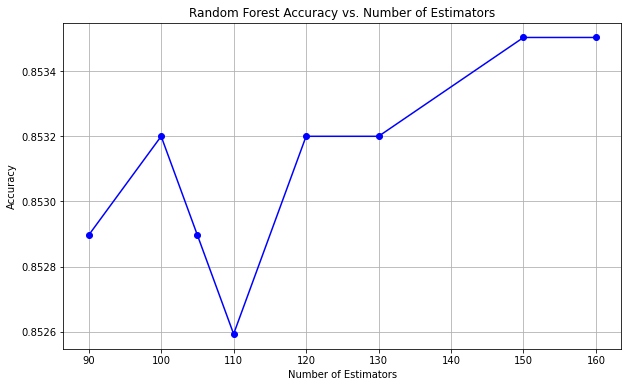

In [126]:
#Chose range of 'n_estimators'
n_estimators_range = [90,100,105,110,120,130,150,160]
accuracies = []

for n_estimators in n_estimators_range:
    rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=42, n_jobs=-1)
    
    rf_model.fit(X_train, y)
    predictions_lp= rf_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, predictions_lp)
    accuracies.append(accuracy)
    print(f"n_estimators: {n_estimators}, Accuracy: {accuracy}")

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, accuracies, marker='o', linestyle='-', color='b')
plt.title('Random Forest Accuracy vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()
# when n_estimators=150 or 160 has the highest accuracy, but sill it is lower than Logistic Regression predictions

## Multinomial Naive Bayes

In [127]:
#Initialize and train the Multinomial Naive Bayes model

from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y)
predictions_mnb = nb_model.predict(X_test)

#Evaluate the model
print(classification_report(y_test, predictions_mnb))
print("Accuracy:", accuracy_score(y_test, predictions_mnb))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        46
           2       0.00      0.00      0.00        44
           3       0.00      0.00      0.00        98
           4       0.00      0.00      0.00       321
           5       0.85      1.00      0.92      2788

    accuracy                           0.85      3297
   macro avg       0.17      0.20      0.18      3297
weighted avg       0.72      0.85      0.78      3297

Accuracy: 0.8456172277828329


/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Decision Tree

In [128]:
#Initialize and train the Multinomial Naive Bayes model
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 150, random_state=42)
dt_model.fit(X_train, y)
predictions_dt = dt_model.predict(X_test)

In [129]:
# Evaluate the model
print(classification_report(y_test, predictions_dt))
print("Accuracy:", accuracy_score(y_test, predictions_dt))

              precision    recall  f1-score   support

           1       0.14      0.15      0.15        46
           2       0.04      0.02      0.03        44
           3       0.17      0.15      0.16        98
           4       0.23      0.20      0.22       321
           5       0.88      0.90      0.89      2788

    accuracy                           0.79      3297
   macro avg       0.29      0.29      0.29      3297
weighted avg       0.77      0.79      0.78      3297

Accuracy: 0.7873824689111313


In [130]:
#Export pred file
pred = pd.Series(predictions_lr).to_csv('pred.csv', index=False, header=False)

In [131]:
#Export accurancy file
accuracy = pd.Series(accuracy_lr).to_csv('accuracy.csv', index=False, header=False)

# Question

### Question a: How does the performance of your model vary across different classes? Analyze and discuss your observations regarding the precision and recall metrics for each class?

The logistic regression model has been chosen as it gives the highest accuracy among all tested models. However, this model's performance varies greatly across the different classes as seen in the provided classification report above. For ratings 1 and 3, we see there is a high to moderate precision but with very low recall. The indicates that the model is fairly accurate when predicting class 1and class 3 but fails to identify 85% and 91% of actual class 1 or class 3 instances.  

For ratings 2 and 4, both precision and recall are low. Rating 2 has 0.33 precision and 0.02 recall and rating 4 has o.49 precision with 0.15 recall. This result suggests that this model can only correct 33% or 49% of time but only be able to identify 2% or 15% of actual rating 2 and 4 instance, suggesting many false negatives.  

For rating 5, this model did a fairly good job with 0.87 precision and 0.99 recall, means this model is very accurate and reliable for rating 5 predictions, correctly identifying 99% of actual rating 5 instances. This suggests that class 5 ratings have distinct features that the model can easily recognize. 

### Question b: Considering your analysis, how would you recommend using this model in a real-world application? Discuss any limitations or considerations that should be taken into account.

In a real-world application for predicting the star rating of different recipe reviews, I would recommend this model for predicting top-rated recipes (5 rating recipes). It would be a very accurate and reliable model as it has a very high recall and precision on predicting rating 5 instances. I also would suggest this model as an assistance tool for the management team to identify potential poor-rating recipes (rating 1-3) and flag these recipes for review, as it has a moderate precision. At the same time, the low recall indicates that not all low-rated recipes will be caught, so it shouldn't be the sole moderation tool. 

However, there are still limitations or considerations regarding using this model in real-life applications. Knowing the model's performance skew towards higher ratings, it's essential to address the rating class imbalance, perhaps by collecting more data for less common ratings. Also, User tastes can vary widely, and what considered a 5-star recipe for one user might not for another. This subjective nature of recipe ratings should be accounted for, possibly by incorporating user profile data into the model to account for demographic elements.  

### Question c: Analyze your data to address the previously identified accuracy issues. Describe your method to address this issue, implement it in code and retrain a classifier, and assess any improvements or ongoing challenges. Your evaluation will be based on your method's appropriateness, not the results.

As discussed in the previous questions, there is a clear imbalance class issue in the dataset, where resulted in model's performance skew towards higher ratings. One straightforward way to improve this issue but avoid data augmentation, is to use Random Forest Classifier with a class weight balanced parameter. This parameter adjusts the weights of the classes inversely proportional to their frequencies in the input data, which can help the classifier pay more attention to the minority classes during training (see code below for more details). However, even after using this parameter, there are only some improvements in certain classes. For ratings 1 and 4, there is a small increase in recall from 0.15 to 0.26. Rating 3's performance remained mostly unchanged. However, there is also a decrease in rating 2’s performance for both precision and recall, there is a bit concerning as a tradeoff. 

Overall, while the class balance parameter helps in mitigating class imbalance, the extremely low recall for Classes 2 and 3 suggests that further adjustments or different approaches may be needed. In addition, the decrease in overall accuracy and the changes in precision and recall suggest a trade-off that improving the detection of minority classes might come at the expense of overall accuracy or performance on the majority class. To better improve the model, we can continue to fine-tune other hyperparameters of the model alongside the class weight to find a more optimal balance. But at the same time, with the imbalance nature of the dataset, it is better to try more targeted resampling strategies. 

In [132]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

X_test_rs = tfidf_vectorizer.transform(df_test_clean['text'])
y_test_rs = df_test_clean['stars']

# Parameter class_weight set to 'balanced'
clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Train the classifier
clf.fit(X_train,y)

# Predict
predictions_rs = clf.predict(X_test_rs)

# Evaluate the classifier

print(classification_report(y_test, predictions_rs))
print(accuracy_score(y_test, predictions_rs))

              precision    recall  f1-score   support

           1       0.24      0.13      0.17        46
           2       1.00      0.02      0.04        44
           3       0.21      0.07      0.11        98
           4       0.50      0.05      0.09       321
           5       0.85      0.98      0.91      2788

    accuracy                           0.84      3297
   macro avg       0.56      0.25      0.27      3297
weighted avg       0.79      0.84      0.79      3297

0.8401577191386108
